In [4]:
import mysql.connector
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [5]:
#connect to mysql server with database baby_names
cnx = mysql.connector.connect(user='python', database='baby_names')
#create mysql cursor object
cur = cnx.cursor()

In [3]:
command = "SELECT * from test2 where name = 'John' and year(year) = '1880'"

In [6]:
cur.execute(command)
cur.fetchall()

[('John', 'F', 46, datetime.date(1880, 1, 1), 229),
 ('John', 'M', 9655, datetime.date(1880, 1, 1), 943)]

In [7]:
input('what is your name?')

what is your name?john


'john'

what is your namejohn
what is your gender?m


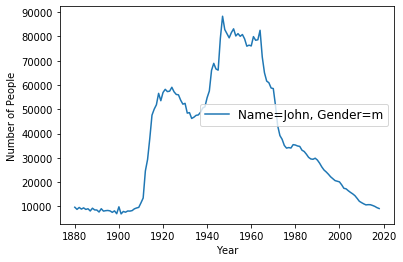

In [8]:
#ask for a name
name=str(input('what is your name'))
#ask for a gender
gender = str(input('what is your gender?'))
#save the query as text
query = "SELECT year(year), frequency FROM test2 WHERE name='"+name+"' AND sex='"+gender+"';"
#perform query and get results
cur.execute(query)
data=cur.fetchall()
#save results into two lists
x_val = [x[0] for x in data]
y_val = [x[1] for x in data]
#plot the lists against each other
plt.plot(x_val,y_val, label="Name="+name.capitalize()+", Gender="+gender)
#create a legend
plt.legend(fontsize=12)
#label axes
plt.xlabel("Year")
plt.ylabel("Number of People")
plt.show()

In [9]:
#make the the previous code into a function
def name_plot(name,gender):
    #save the query as text
    query = "SELECT year(year), frequency FROM test2 WHERE name='"+name+"' AND sex='"+gender+"';"
    #perform query and get results
    cur.execute(query)
    data=cur.fetchall()
    #save results into two lists
    x_val = [x[0] for x in data]
    y_val = [x[1] for x in data]
    #plot the lists against each other
    plt.plot(x_val,y_val, label="Name="+name.capitalize()+", Gender="+gender)
    

In [10]:
#separate function to show graph so the axes won't get written over multiple times
def name_show():
    #create a legend
    plt.legend(fontsize=7,loc='best')
    #label axes
    plt.xlabel("Year")
    plt.ylabel("Number of People")
    plt.show()

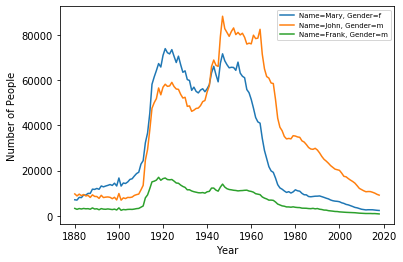

In [67]:
name_plot('mary','f')
name_plot('john','m')
name_plot('frank','m')
name_show()

In [2]:
#make the function output bigger
#the input is now a list of names and genders like [('john','m'),('rachel','f')]
def large_name_plot(name_list):
    #create figure and subfigure
    fig = plt.figure(figsize=(10,10))
    sub = fig.subplots()
    sub.set_xlabel('Year')
    sub.set_ylabel('Numbe of People')
    max_max = 0
    for name,gender in name_list:
        #save the query as text
        query = "SELECT year(year), frequency FROM test2 WHERE name='"+name+"' AND sex='"+gender+"';"
        #perform query and get results
        cur.execute(query)
        data=cur.fetchall()
        #save results into two lists
        #year
        x_val = [x[0] for x in data]
        #number of people
        y_val = [x[1] for x in data]
        #maximum number of names
        y_max = max(y_val)
        #year where maximum numbe appeared
        x_max = data[y_val.index(y_max)][0]
        #annotate the maximum
        plt.annotate(str(name).capitalize()+' ('+str(gender)+')'+' peaked at '+str(y_max)+' in ' + str(x_max), 
                 xy=(x_max,y_max), xytext=(x_max+(x_max+100)/100,y_max+(y_max+1000)/2000),
             arrowprops=dict(facecolor='black', shrink=.1,width = 1,headwidth=10))
        #make a dot where the maximum is
        sub.plot(x_max,y_max,'bo')
        #plot the lists against each other
        sub.plot(x_val,y_val, label="Name="+name.capitalize()+", Gender="+gender)
        #create a legend
        sub.legend(fontsize=10,loc='center left')

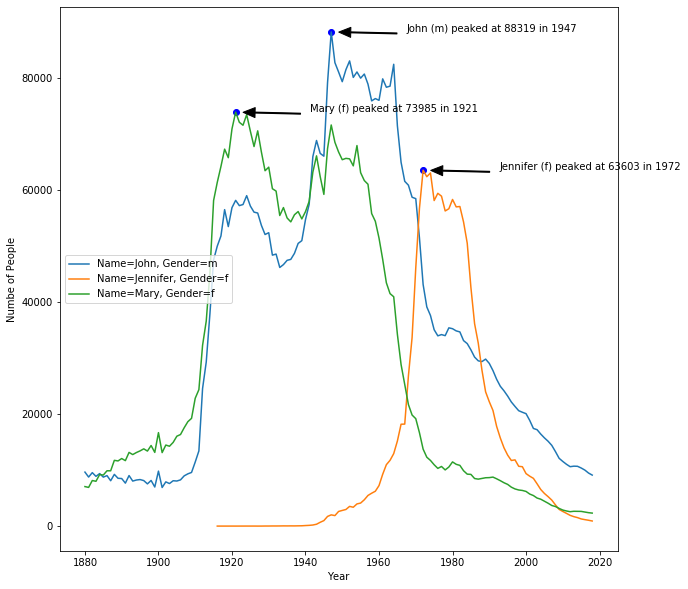

In [215]:
large_name_plot([('john','m'),('jennifer','f'),('mary','f')])

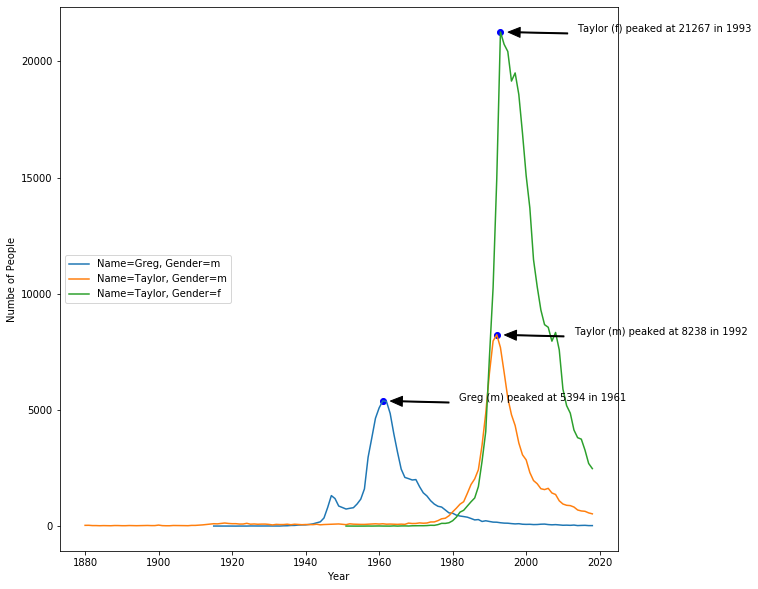

In [217]:
large_name_plot([('greg','m'),('taylor','m'),('taylor','f')])

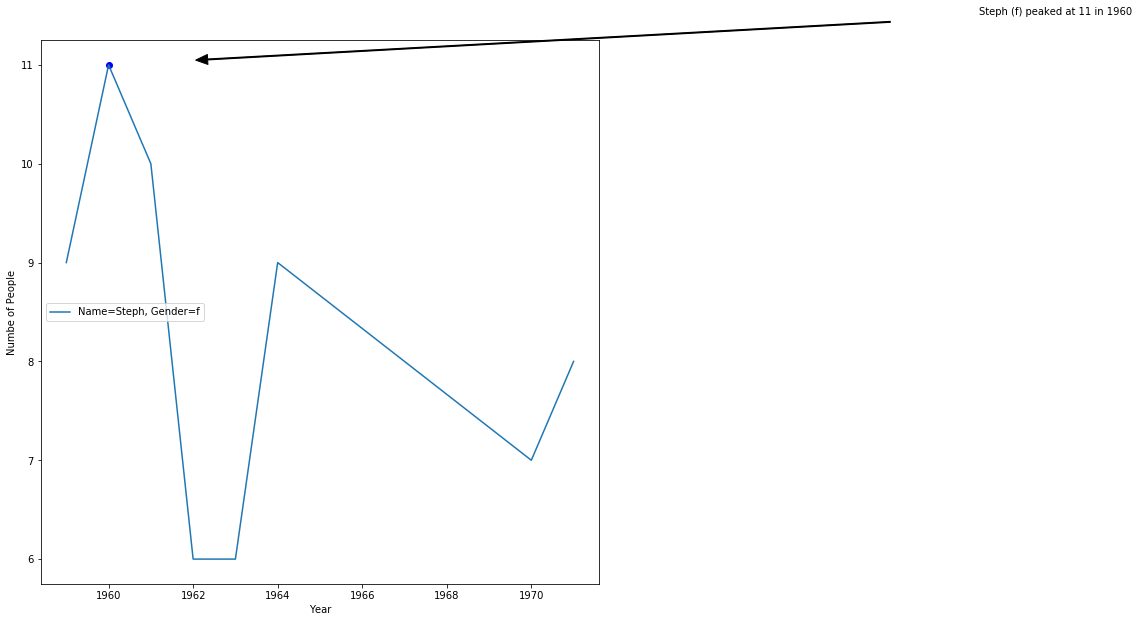

In [216]:
large_name_plot([('steph','f')])

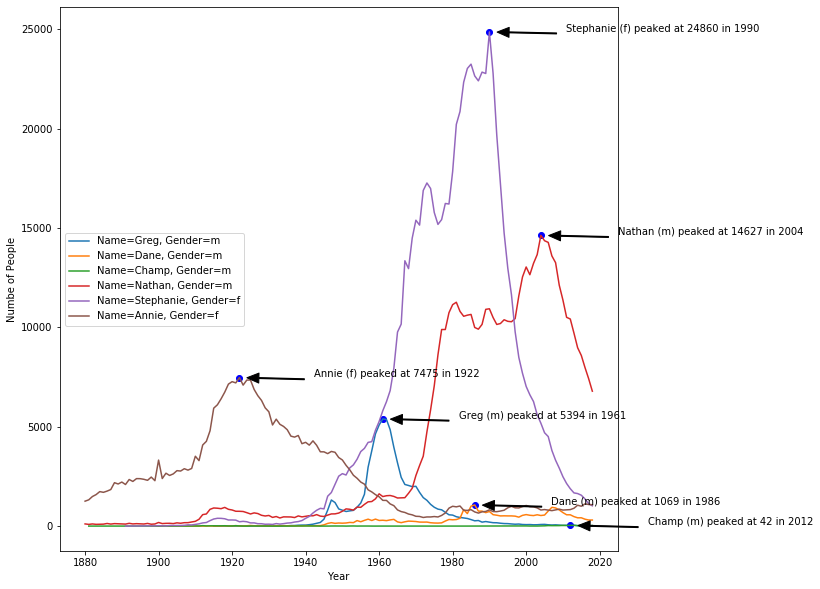

In [218]:
large_name_plot([('greg','m'),('dane','m'),('champ','m'),('nathan','m'),('stephanie','f'),('annie','f')])

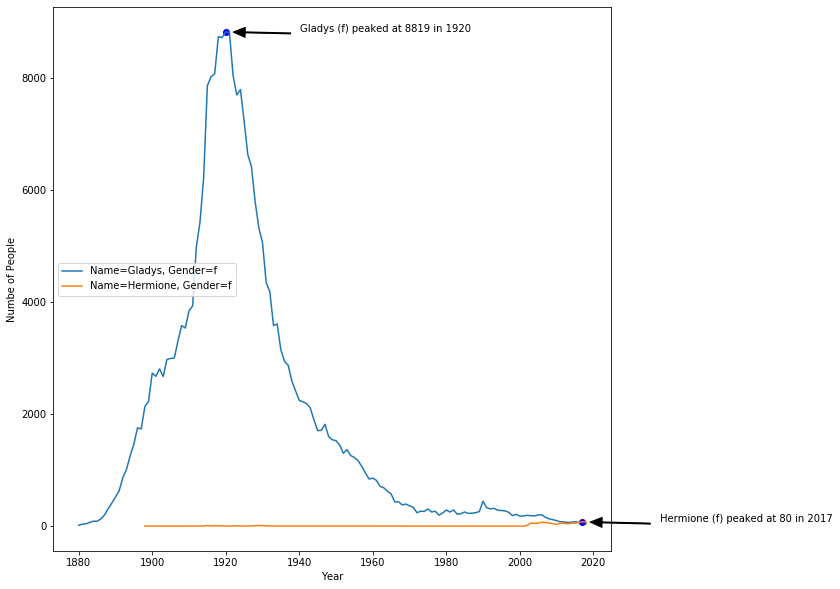

In [221]:
large_name_plot([('gladys','f'),('hermione','f')])

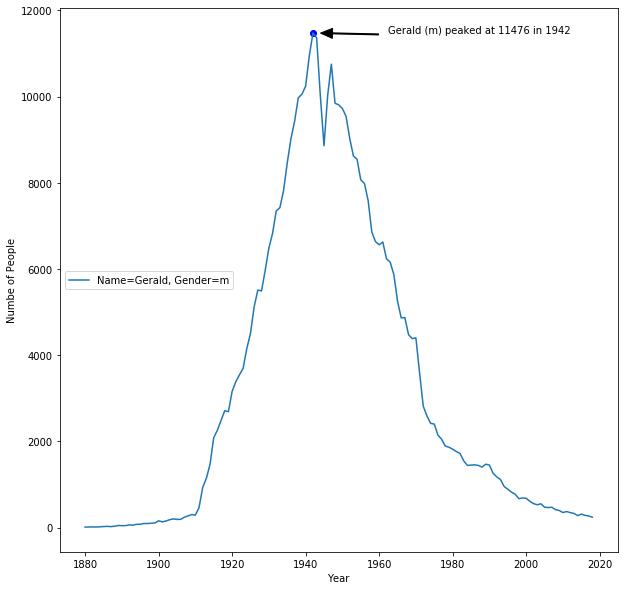

In [224]:
large_name_plot([('gerald','m')])

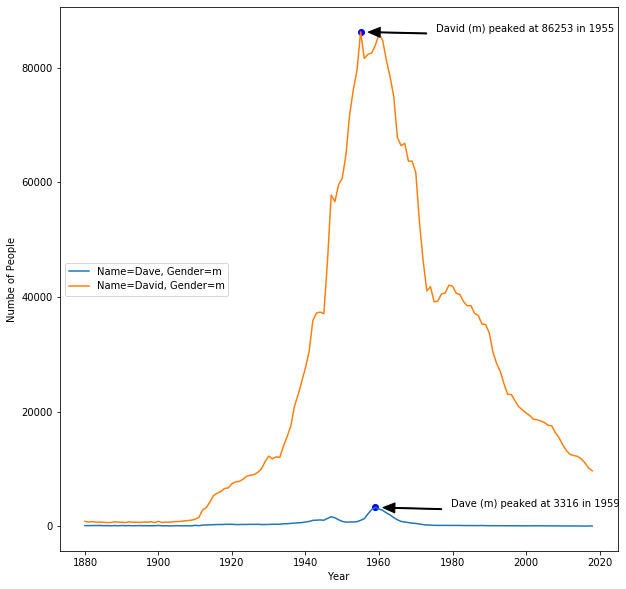

In [15]:
large_name_plot([('dave','m'),('david','m')])

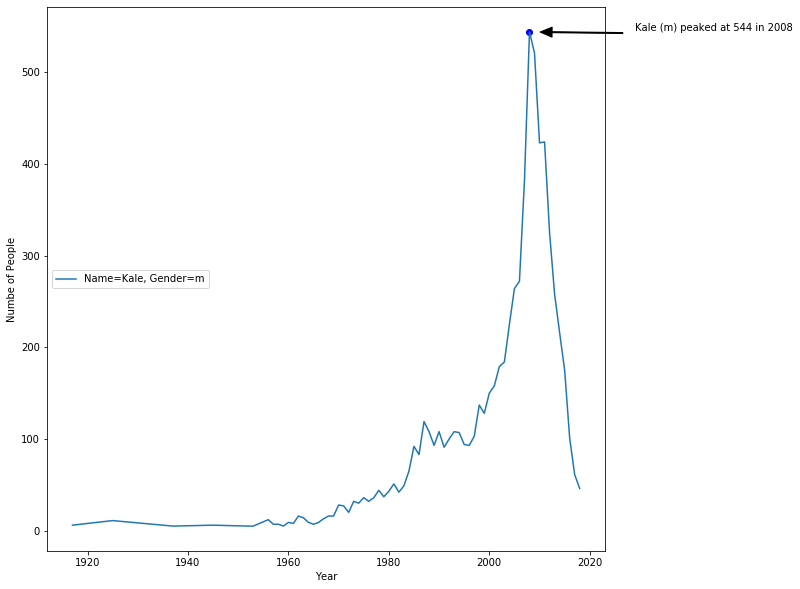

In [33]:
large_name_plot([('kale','m')])

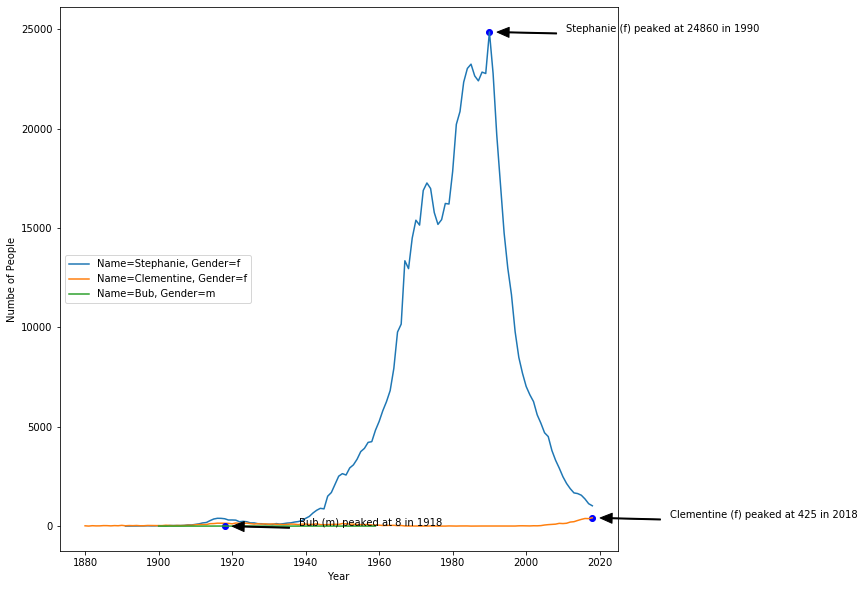

In [6]:
large_name_plot([('stephanie','f'),('clementine','f'),('bub','m')])

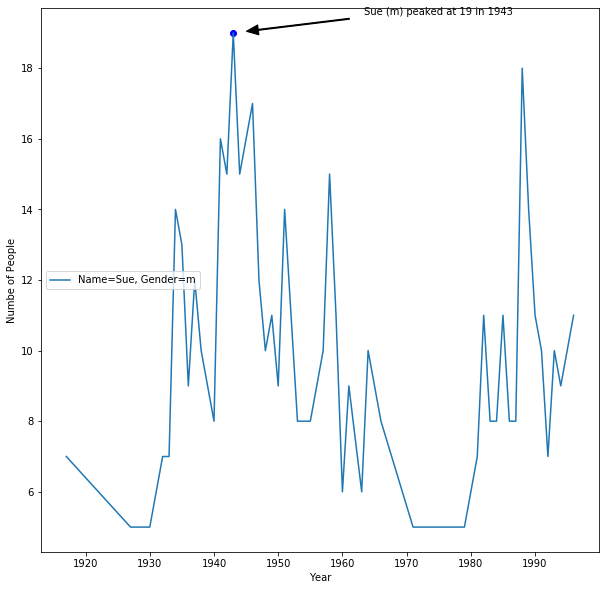

In [42]:
large_name_plot([('sue','m')])

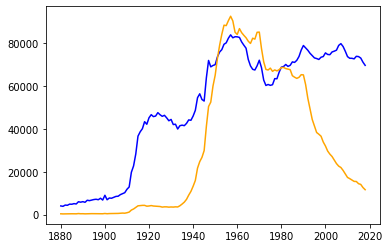

In [46]:
#popularity of a given name versus total names (adjusted)
query_total = "select year(year), sum(frequency) from baby group by year;"
cur.execute(query_total)
total_people = cur.fetchall()
query = "select year(year), frequency from baby where name = 'michael' and sex = 'm';"
cur.execute(query)
people = cur.fetchall()
x_val = [x[0] for x in total_people]
tot_val = [(.02*float(x[1])) for x in total_people]
x_person = [x[0] for x in people]
person_val = [x[1] for x in people]
plt.plot(x_val,tot_val, color = "blue")
plt.plot(x_person,person_val, color = 'orange')
plt.show()